Calcule as frequências de vibração e os conjuntos de deslocamentos para uma cadeia unidimensional de 
100 e depois de 300 corpos de massas iguais (m = 1 kg), todos unidos por molas iguais (k = 1 kg/s2).
Apresente os resultados em gráficos da densidade de estados para ω2 e os deslocamentos relativos para as cinco
primeiras e cinco últimas frequências (em ordem crescente).


In [1]:
import numpy as np 
import matplotlib.pyplot as plt

massa = 1 
kmola = 1
n1 = 100
n2 = 300

Passo 1: montar a matriz dinâmica

Passo 2: Fazer os autovalores ($\omega^2$) e autovertores ($\vec x$)

Passo 3: plotar o histograma de $\omega^2$ 

Passo 4: ordenar o autovalores e autovetores nas posições atreladas 

Passo 5: apresentar as 5 primeiras e 5 ultimas frequencias e autovetores em ordem crescente

In [2]:
def matrizDin (matriz):
    for m, linha in enumerate(matriz):
        for n, item in enumerate(linha):
            if m==n : 
                matriz[m][n] = (kmola+kmola)/massa
            elif (m == (n+1)) or (m == (n-1)):
                matriz[m][n] = -kmola/massa
            else:
                matriz[m][n] = 0
    return matriz

dinamica1, dinamica2 = matrizDin(np.zeros((n1,n1))), matrizDin(np.zeros((n2,n2)))
omega1, deloc1 = np.linalg.eig(dinamica1)
omega2, deloc2 = np.linalg.eig(dinamica2)

Text(0.5, 1.0, 'Densidade de estados para n=100')

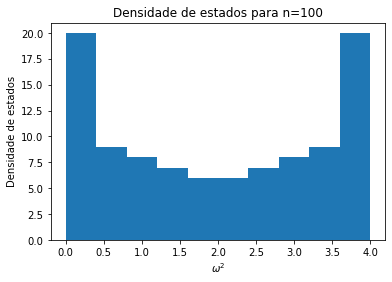

In [3]:
plt.figure()
plt.hist(omega1)
plt.ylabel("Densidade de estados")
plt.xlabel("$\omega ^2 $")
plt.title("Densidade de estados para n=100")

Text(0.5, 1.0, 'Densidade de estados para n=300')

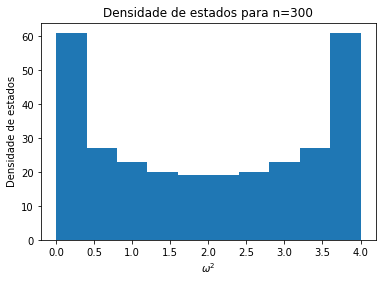

In [4]:
plt.figure()
plt.hist(omega2)
plt.ylabel("Densidade de estados")
plt.xlabel("$\omega ^2 $")
plt.title("Densidade de estados para n=300")

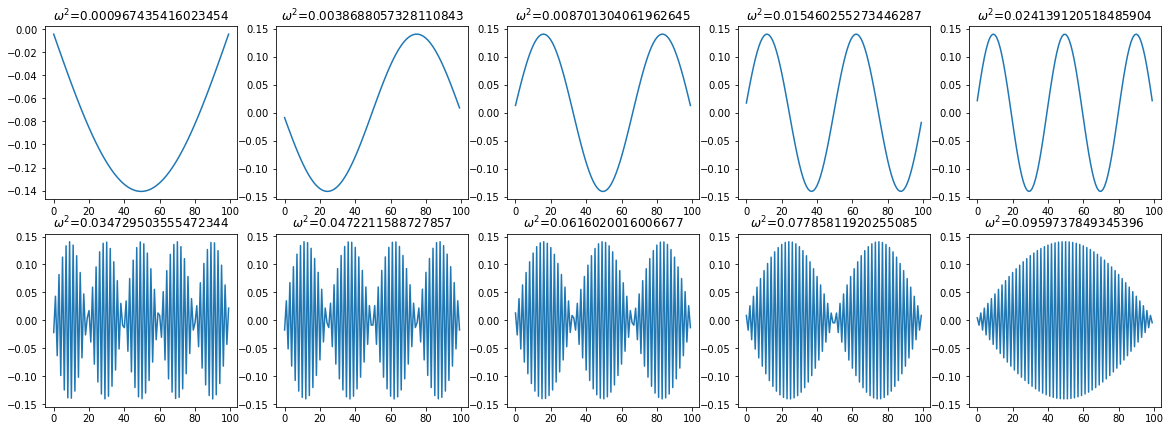

In [17]:
def ordena_eig(w,v): #ordena os autovalores e autovetores em ordem crescente
    for i in range(len(w)):
        for j in range(i+1,len(w)):
            if w[j]<w[i]:

                menor=w[j]        
                w[j]=w[i]
                w[i]=menor
            
                v[:,[j,i]]=v[:,[i,j]] #troca a coluna do autovetor associado ao autovalor j pela coluna do autovetor associado ao autovalor i   
    return w,v 

ordemW1, ordemVec1 = ordena_eig(omega1, deloc1)
ordemW2, ordemVec2 = ordena_eig(omega2, deloc2)

plt.figure(figsize=(20, 7))
for i, vetorr in enumerate(np.concatenate((ordemVec1.transpose()[:5],ordemVec1.transpose()[-5:]))):
    plt.subplot(2,5,i+1)
    plt.plot(vetorr)
    plt.title(f'$\omega^2$={omega1[i]}')

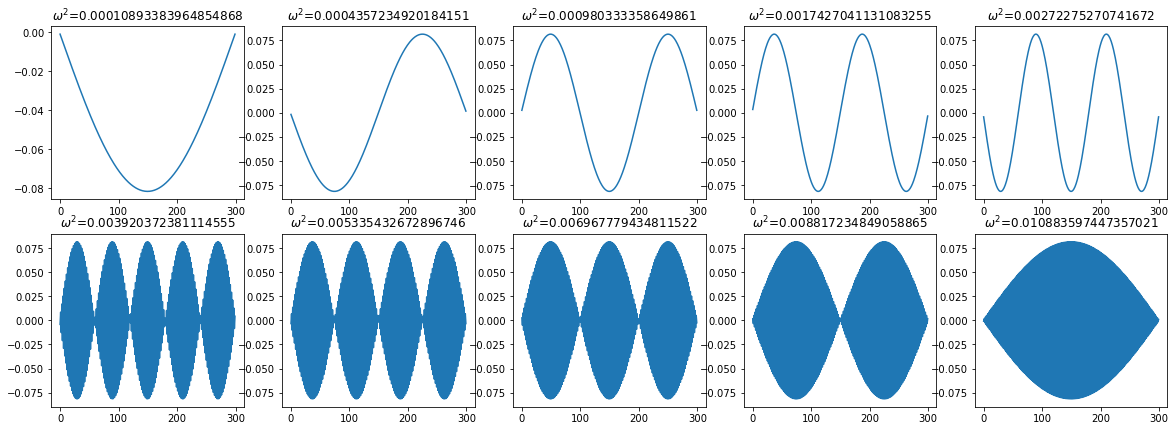

In [16]:
plt.figure(figsize=(20, 7))
for i, vetorr in enumerate(np.concatenate((ordemVec2.transpose()[:5],ordemVec2.transpose()[-5:]))):
    plt.subplot(2,5,i+1)
    plt.plot(vetorr)
    plt.title(f'$\omega^2$={omega2[i]}')